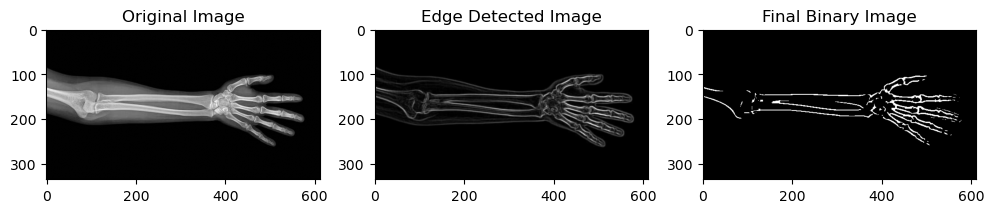

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('data/xray.jpg', cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(image, (3, 3), 0)

edge_image = np.zeros_like(blurred)

height, width = blurred.shape
for y in range(1, height - 1):
    for x in range(1, width - 1):
        block_3x3 = blurred[y - 1:y + 2, x - 1:x + 2]
        max_val = np.max(block_3x3)
        min_val = np.min(block_3x3)
        range_val = max_val - min_val
        edge_image[y, x] = range_val

threshold = 50  
_, binary_image = cv2.threshold(edge_image, threshold, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Edge Detected Image")
plt.imshow(edge_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Final Binary Image")
plt.imshow(morphed_image, cmap='gray')

plt.show()
